#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

#### Reading the data

In [2]:
data = pd.read_csv("housing_data.csv")

#### Data pre-processing

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,NaN,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,NaN,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


In [4]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
495,0.06263,0.0,11.93,0.0,0.573,6.593,69.099998,2.4786,1.0,273.0,21.0,391.989990,9.67,22.4
496,0.04527,0.0,11.93,0.0,0.573,6.120,76.699997,2.2875,1.0,273.0,21.0,396.899994,9.08,20.6
497,0.06076,0.0,11.93,0.0,NaN,6.976,91.000000,2.1675,1.0,273.0,21.0,396.899994,5.64,23.9
498,0.10959,0.0,11.93,0.0,0.573,6.794,89.300003,2.3889,1.0,273.0,21.0,393.450012,6.48,22.0
499,0.04741,0.0,11.93,0.0,0.573,6.030,80.800003,2.5050,1.0,273.0,21.0,396.899994,7.88,11.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
CRIM     493 non-null float64
ZN       493 non-null float64
INDUS    496 non-null float64
CHAS     495 non-null float64
NOX      494 non-null float64
RM       496 non-null float64
AGE      497 non-null float64
DIS      496 non-null float64
RAD      495 non-null float64
TAX      494 non-null float64
PT       491 non-null float64
B        496 non-null float64
LSTAT    494 non-null float64
MV       500 non-null float64
dtypes: float64(14)
memory usage: 54.8 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,493.000000,493.000000,496.000000,495.000000,494.000000,496.000000,497.000000,496.000000,495.000000,494.000000,491.000000,496.000000,494.000000,500.000000
mean,3.655323,11.247465,11.124819,0.070707,0.553837,6.288677,68.575252,3.785060,9.539394,407.489879,18.465784,356.595966,12.648178,22.564400
std,8.695102,23.233824,6.862173,0.256594,0.114877,0.707249,28.181075,2.104649,8.707922,168.483364,2.170162,91.632923,7.117030,9.236213
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.448250,5.884750,44.400002,2.097050,4.000000,279.000000,17.400000,375.299988,6.950000,17.075000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.699997,3.190950,5.000000,330.000000,19.100000,391.339996,11.430000,21.200001
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.629250,94.099998,5.118000,24.000000,666.000000,20.200001,396.209992,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


#### Correlation Plot

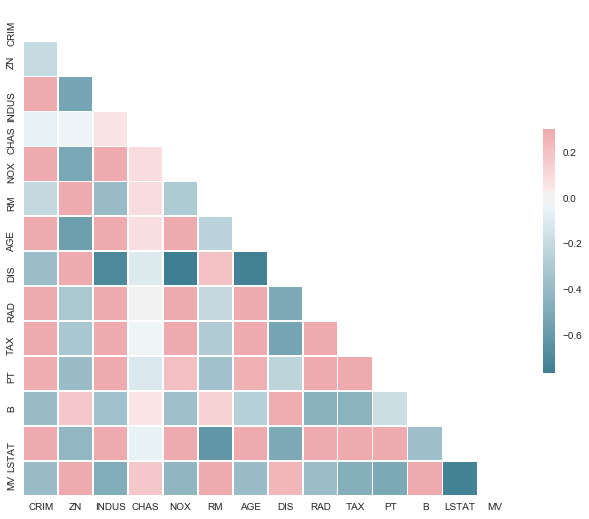

In [7]:
sns.set(style="white")

#Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
y = data.MV #define the target variable (dependent variable) as y

#### Train/Test Split

In [9]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 14) (350,)
(150, 14) (150,)


#### Checking NA values

In [10]:
data.isnull().sum()

CRIM     7
ZN       7
INDUS    4
CHAS     5
NOX      6
RM       4
AGE      3
DIS      4
RAD      5
TAX      6
PT       9
B        4
LSTAT    6
MV       0
dtype: int64

#### removing na values

In [13]:
X_train = X_train[np.isfinite(X_train)]

In [14]:
X_train.isnull().sum()

CRIM     5
ZN       6
INDUS    4
CHAS     2
NOX      1
RM       4
AGE      2
DIS      4
RAD      4
TAX      5
PT       6
B        3
LSTAT    5
MV       0
dtype: int64

#### Fitting Multiple Linear Regression Model to the training set

In [11]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').